# BUSINESS UNDERSTANDING

The focus of this work will be develop a machine learning model to support our choice, increasing the chance of success.

The most common and basic bet for soccer games is the choice between the victory of a team either 1 or team 2 or a draw. So basically this is a classification problem, where the goal is to classify the game as Home, Away, or Draw.

The source is a compilated data from soccer results and odds, displayed in this github. There are datasets for many countries, and to this project has been chosen La Liga of Spain. There are 39 .csv files, containing the data divided by seasons (SP), where each row represents the information regarding a unique game.

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=None,precision = 2)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('precision',2)

In the file readme.md displayed at https://github.com/jokecamp/FootballData/tree/master/football-data.co.uk, we find the description of each column. The columns are based on metadata (key information about the matches), matches statistics and betting odds. 
Considering the objective, the betting odds could bring some bias to the model, since it carry the values which the gambling site is offering. So, we will remove the odds columns.



Key to results data:

Div = League Division Date = Match Date (dd/mm/yy) HomeTeam = Home Team AwayTeam = Away Team FTHG = Full Time Home Team Goals FTAG = Full Time Away Team Goals FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win) HTHG = Half Time Home Team Goals HTAG = Half Time Away Team Goals HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available) Attendance = Crowd Attendance Referee = Match Referee HS = Home Team Shots AS = Away Team Shots HST = Home Team Shots on Target AST = Away Team Shots on Target HHW = Home Team Hit Woodwork AHW = Away Team Hit Woodwork HC = Home Team Corners AC = Away Team Corners HF = Home Team Fouls Committed AF = Away Team Fouls Committed HO = Home Team Offsides AO = Away Team Offsides HY = Home Team Yellow Cards AY = Away Team Yellow Cards HR = Home Team Red Cards AR = Away Team Red Cards HBP = Home Team Bookings Points (10 = yellow, 25 = red) ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Key to 1X2 (match) betting odds data:

B365H = Bet365 home win odds B365D = Bet365 draw odds B365A = Bet365 away win odds BSH = Blue Square home win odds BSD = Blue Square draw odds BSA = Blue Square away win odds BWH = Bet&Win home win odds BWD = Bet&Win draw odds BWA = Bet&Win away win odds GBH = Gamebookers home win odds GBD = Gamebookers draw odds GBA = Gamebookers away win odds IWH = Interwetten home win odds IWD = Interwetten draw odds IWA = Interwetten away win odds LBH = Ladbrokes home win odds LBD = Ladbrokes draw odds LBA = Ladbrokes away win odds PSH = Pinnacle Sports home win odds PSD = Pinnacle Sports draw odds PSA = Pinnacle Sports away win odds SOH = Sporting Odds home win odds SOD = Sporting Odds draw odds SOA = Sporting Odds away win odds SBH = Sportingbet home win odds SBD = Sportingbet draw odds SBA = Sportingbet away win odds SJH = Stan James home win odds SJD = Stan James draw odds SJA = Stan James away win odds SYH = Stanleybet home win odds SYD = Stanleybet draw odds SYA = Stanleybet away win odds VCH = VC Bet home win odds VCD = VC Bet draw odds VCA = VC Bet away win odds WHH = William Hill home win odds WHD = William Hill draw odds WHA = William Hill away win odds

Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums BbMxH = Betbrain maximum home win odds BbAvH = Betbrain average home win odds BbMxD = Betbrain maximum draw odds BbAvD = Betbrain average draw win odds BbMxA = Betbrain maximum away win odds BbAvA = Betbrain average away win odds

Key to total goals betting odds:

BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums BbMx>2.5 = Betbrain maximum over 2.5 goals BbAv>2.5 = Betbrain average over 2.5 goals BbMx<2.5 = Betbrain maximum under 2.5 goals BbAv<2.5 = Betbrain average under 2.5 goals

GB>2.5 = Gamebookers over 2.5 goals GB<2.5 = Gamebookers under 2.5 goals B365>2.5 = Bet365 over 2.5 goals B365<2.5 = Bet365 under 2.5 goals

Key to Asian handicap betting odds:

BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums BbAHh = Betbrain size of handicap (home team) BbMxAHH = Betbrain maximum Asian handicap home team odds BbAvAHH = Betbrain average Asian handicap home team odds BbMxAHA = Betbrain maximum Asian handicap away team odds BbAvAHA = Betbrain average Asian handicap away team odds

GBAHH = Gamebookers Asian handicap home team odds GBAHA = Gamebookers Asian handicap away team odds GBAH = Gamebookers size of handicap (home team) LBAHH = Ladbrokes Asian handicap home team odds LBAHA = Ladbrokes Asian handicap away team odds LBAH = Ladbrokes size of handicap (home team) B365AHH = Bet365 Asian handicap home team odds B365AHA = Bet365 Asian handicap away team odds B365AH = Bet365 size of handicap (home team)

Football-Data would like to acknowledge the following sources which have been utilised in the compilation of Football-Data's results and odds files.




# DATA ANALYSIS

In [2]:
from IPython.display import display, HTML

import matplotlib.pyplot as plt

futebol = pd.read_excel('/content/Campeonato_Espanhol.xlsx', sheet_name='Futebol')

In [3]:
futebol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       3040 non-null   object 
 1   Date      3040 non-null   object 
 2   HomeTeam  3040 non-null   object 
 3   AwayTeam  3040 non-null   object 
 4   FTHG      3040 non-null   int64  
 5   FTAG      3040 non-null   int64  
 6   FTR       3040 non-null   object 
 7   HTHG      3040 non-null   int64  
 8   HTAG      3040 non-null   int64  
 9   HTR       3040 non-null   object 
 10  HS        3040 non-null   int64  
 11  AS        3040 non-null   int64  
 12  HST       3040 non-null   int64  
 13  AST       3040 non-null   int64  
 14  HF        3040 non-null   int64  
 15  AF        3040 non-null   int64  
 16  HC        3040 non-null   int64  
 17  AC        3040 non-null   int64  
 18  HY        3040 non-null   int64  
 19  AY        3040 non-null   int64  
 20  HR        3040 non-null   int6

In [4]:
futebol.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
count,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3033.00,3033.00,3033.00,3039.00,3039.00,3039.00,3040.00,3040.00,3040.00,3035.00,3035.00,3035.00,2941.00,2941.00,2941.00,3038.00,3038.00,3038.00,3035.00,3035.00,3035.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,2280.00,2280.00,2280.00
mean,1.57,1.13,0.70,0.50,14.26,11.25,5.17,3.95,16.50,16.29,6.02,4.46,2.44,2.74,0.16,0.21,2.53,3.81,4.70,2.48,3.75,4.47,2.48,3.72,4.51,2.40,3.57,4.23,2.41,3.66,4.29,2.48,3.76,4.49,2.46,3.64,4.44,2.51,3.78,4.81,2.53,3.83,4.73,14.52,3.47,3.99,29.93,2.95,3.12,4.21,11.17,4.72,4.06,24.75,1.97,6.80,1.48,1.98,16.15,0.26,1.96,1.90,2.22,2.12
std,1.31,1.13,0.86,0.72,5.14,4.50,2.67,2.30,5.03,5.04,3.02,2.54,1.45,1.51,0.41,0.47,1.84,1.20,4.00,1.73,1.18,3.54,1.68,1.11,3.51,1.49,0.85,2.97,1.62,1.07,3.17,1.75,1.24,3.69,1.74,1.10,3.76,1.86,1.22,4.35,1.99,1.45,4.55,21.46,1.35,3.52,15.59,2.16,2.52,1.98,12.97,5.34,3.80,13.85,3.26,8.67,1.17,0.37,8.82,1.21,0.54,0.52,0.89,0.73
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.04,2.75,1.10,1.03,2.70,1.12,1.05,2.75,1.12,1.05,2.50,1.15,1.04,2.62,1.14,1.03,2.60,1.11,1.05,2.75,1.14,1.04,2.70,1.13,1.04,2.90,1.12,1.04,1.15,1.13,3.20,1.06,1.04,1.17,2.79,1.15,1.12,1.55,1.24,1.21,-2.00,1.45,1.41,-3.00,1.03,1.02,1.06,1.04
25%,1.00,0.00,0.00,0.00,11.00,8.00,3.00,2.00,13.00,13.00,4.00,3.00,1.00,2.00,0.00,0.00,1.72,3.25,2.75,1.67,3.20,2.65,1.70,3.20,2.70,1.70,3.10,2.65,1.67,3.20,2.60,1.70,3.20,2.65,1.70,3.20,2.62,1.70,3.25,2.75,1.67,3.20,2.65,1.83,3.20,2.21,22.50,1.92,1.82,3.39,3.28,2.25,2.09,7.44,1.68,1.79,1.59,1.76,5.30,-0.50,1.83,1.76,1.91,1.86
50%,1.00,1.00,0.00,0.00,14.00,11.00,5.00,4.00,16.00,16.00,6.00,4.00,2.00,3.00,0.00,0.00,2.10,3.40,3.50,2.05,3.30,3.50,2.10,3.30,3.50,2.00,3.30,3.30,2.00,3.30,3.40,2.06,3.35,3.40,2.05,3.30,3.40,2.05,3.40,3.60,2.05,3.40,3.50,2.30,3.30,3.00,37.00,2.44,2.25,3.57,3.54,3.26,3.00,31.00,1.92,2.01,1.85,1.90,19.00,0.00,1.94,1.89,2.04,1.97
75%,2.00,2.00,1.00,1.00,17.00,14.00,7.00,5.00,20.00,20.00,8.00,6.00,3.00,4.00,0.00,0.00,2.50,3.75,5.00,2.50,3.70,4.85,2.50,3.60,5.00,2.50,3.50,4.50,2.40,3.50,4.50,2.50,3.72,4.75,2.50,3.60,4.50,2.50,3.75,5.00,2.50,3.75,5.00,19.00,3.60,4.33,40.00,3.20,3.30,4.26,14.32,4.68,4.24,34.00,2.13,8.97,2.10,2.07,23.00,1.75,2.05,2.00,2.19,2.09
max,8.00,8.00,6.00,5.00,37.00,39.00,20.00,16.00,37.00,36.00,19.00,15.00,8.00,9.00,3.00,4.00,23.00,13.00,34.00,21.00,15.00,36.00,17.00,11.00,34.00,14.00,10.00,25.00,17.00,12.00,26.00,19.00,16.75,34.00,23.00,13.00,51.00,23.00,13.00,41.00,29.00,19.00,67.00,78.00,14.00,34.00,50.00,32.00,23.00,19.00,47.00,56.00,33.22,47.00,181.00,30.00,4.80,4.19,31.00,2.85,11.00,9.39,15.00,11.98


Considering the objective, the betting odds could add some bias to the model, since it carries the values which the gambling platform is offering. So, we will remove the odds columns 

In [5]:
futebol = futebol.drop(['Div','B365H','B365D','B365A','BWH','BWD','BWA','GBH','GBD','GBA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','BSH','BSD','BSA','Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA','BbOU','BbMx>2.5','BbAv>2.5','BbMx<2.5','BbAv<2.5','BbAH','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA'], axis=1)

In [6]:
futebol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3040 non-null   object
 1   HomeTeam  3040 non-null   object
 2   AwayTeam  3040 non-null   object
 3   FTHG      3040 non-null   int64 
 4   FTAG      3040 non-null   int64 
 5   FTR       3040 non-null   object
 6   HTHG      3040 non-null   int64 
 7   HTAG      3040 non-null   int64 
 8   HTR       3040 non-null   object
 9   HS        3040 non-null   int64 
 10  AS        3040 non-null   int64 
 11  HST       3040 non-null   int64 
 12  AST       3040 non-null   int64 
 13  HF        3040 non-null   int64 
 14  AF        3040 non-null   int64 
 15  HC        3040 non-null   int64 
 16  AC        3040 non-null   int64 
 17  HY        3040 non-null   int64 
 18  AY        3040 non-null   int64 
 19  HR        3040 non-null   int64 
 20  AR        3040 non-null   int64 
dtypes: int64(16), 

In [7]:
#Rename the columns to improve our understanding during the analysis
futebol.columns = ['Data','Time_Casa','Time_Vis','Qte_Final_Gols_Casa','Qte_Final_Gols_Vis','Resultado_Final','Qte_gols_1_tempo_Time_Casa','Qte_gols_1_tempo_Time_Vis','Resultado_1_Tempo','Qte_Chutes_Casa','Qte_Chutes_Vis','Qte_Chutes_Gol_Casa','Qte_Chutes_Gol_Vis','Qte_Faltas_Casa_Cometeu','Qte_Faltas_Vis_Cometeu','Qte_Escanteios_Casa','Qte_Escanteios_Vis','Amarelos_Casa','Amarelos_Vis','Vermelhos_Casa','Vermelhos_Vis']

In [8]:
print(futebol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Data                        3040 non-null   object
 1   Time_Casa                   3040 non-null   object
 2   Time_Vis                    3040 non-null   object
 3   Qte_Final_Gols_Casa         3040 non-null   int64 
 4   Qte_Final_Gols_Vis          3040 non-null   int64 
 5   Resultado_Final             3040 non-null   object
 6   Qte_gols_1_tempo_Time_Casa  3040 non-null   int64 
 7   Qte_gols_1_tempo_Time_Vis   3040 non-null   int64 
 8   Resultado_1_Tempo           3040 non-null   object
 9   Qte_Chutes_Casa             3040 non-null   int64 
 10  Qte_Chutes_Vis              3040 non-null   int64 
 11  Qte_Chutes_Gol_Casa         3040 non-null   int64 
 12  Qte_Chutes_Gol_Vis          3040 non-null   int64 
 13  Qte_Faltas_Casa_Cometeu     3040 non-null   int6

In [9]:
futebol.describe()

,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis
count,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00
mean,1.57,1.13,0.70,0.50,14.26,11.25,5.17,3.95,16.50,16.29,6.02,4.46,2.44,2.74,0.16,0.21
std,1.31,1.13,0.86,0.72,5.14,4.50,2.67,2.30,5.03,5.04,3.02,2.54,1.45,1.51,0.41,0.47
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,11.00,8.00,3.00,2.00,13.00,13.00,4.00,3.00,1.00,2.00,0.00,0.00
50%,1.00,1.00,0.00,0.00,14.00,11.00,5.00,4.00,16.00,16.00,6.00,4.00,2.00,3.00,0.00,0.00
75%,2.00,2.00,1.00,1.00,17.00,14.00,7.00,5.00,20.00,20.00,8.00,6.00,3.00,4.00,0.00,0.00
max,8.00,8.00,6.00,5.00,37.00,39.00,20.00,16.00,37.00,36.00,19.00,15.00,8.00,9.00,3.00,4.00


In [10]:
futebol['Data']= pd.to_datetime(futebol['Data']) 
  
futebol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Data                        3040 non-null   datetime64[ns]
 1   Time_Casa                   3040 non-null   object        
 2   Time_Vis                    3040 non-null   object        
 3   Qte_Final_Gols_Casa         3040 non-null   int64         
 4   Qte_Final_Gols_Vis          3040 non-null   int64         
 5   Resultado_Final             3040 non-null   object        
 6   Qte_gols_1_tempo_Time_Casa  3040 non-null   int64         
 7   Qte_gols_1_tempo_Time_Vis   3040 non-null   int64         
 8   Resultado_1_Tempo           3040 non-null   object        
 9   Qte_Chutes_Casa             3040 non-null   int64         
 10  Qte_Chutes_Vis              3040 non-null   int64         
 11  Qte_Chutes_Gol_Casa         3040 non-null   int64       

In [11]:
futebol.isnull().sum()

Data                          0
Time_Casa                     0
Time_Vis                      0
Qte_Final_Gols_Casa           0
Qte_Final_Gols_Vis            0
Resultado_Final               0
Qte_gols_1_tempo_Time_Casa    0
Qte_gols_1_tempo_Time_Vis     0
Resultado_1_Tempo             0
Qte_Chutes_Casa               0
Qte_Chutes_Vis                0
Qte_Chutes_Gol_Casa           0
Qte_Chutes_Gol_Vis            0
Qte_Faltas_Casa_Cometeu       0
Qte_Faltas_Vis_Cometeu        0
Qte_Escanteios_Casa           0
Qte_Escanteios_Vis            0
Amarelos_Casa                 0
Amarelos_Vis                  0
Vermelhos_Casa                0
Vermelhos_Vis                 0
dtype: int64

In [12]:
futebol.describe()

,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis
count,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00,3040.00
mean,1.57,1.13,0.70,0.50,14.26,11.25,5.17,3.95,16.50,16.29,6.02,4.46,2.44,2.74,0.16,0.21
std,1.31,1.13,0.86,0.72,5.14,4.50,2.67,2.30,5.03,5.04,3.02,2.54,1.45,1.51,0.41,0.47
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,11.00,8.00,3.00,2.00,13.00,13.00,4.00,3.00,1.00,2.00,0.00,0.00
50%,1.00,1.00,0.00,0.00,14.00,11.00,5.00,4.00,16.00,16.00,6.00,4.00,2.00,3.00,0.00,0.00
75%,2.00,2.00,1.00,1.00,17.00,14.00,7.00,5.00,20.00,20.00,8.00,6.00,3.00,4.00,0.00,0.00
max,8.00,8.00,6.00,5.00,37.00,39.00,20.00,16.00,37.00,36.00,19.00,15.00,8.00,9.00,3.00,4.00


In [13]:
futebol.duplicated().sum()

0

In [14]:
#Checking if there are wrong typing of teams
a = np.sort(futebol["Time_Casa"].unique())

b = np.sort(futebol["Time_Vis"].unique())

result = np.all(a == b)
print (result)

True


In [15]:
#Check if the dataset is sorted
test_list1 = futebol["Data"]
test_list = test_list1.sort_values()
np.array_equal(test_list1.values,test_list.values)


False

In [16]:
futebol["Data"].value_counts()

2007-06-17    10
2012-05-05    10
2011-05-15    10
2013-06-01    10
2008-05-11    10
              ..
2006-05-04     1
2006-09-23     1
2012-12-10     1
2012-03-05     1
2009-08-31     1
Name: Data, Length: 731, dtype: int64

Let's sort the database by data to ensure that we can stabilish an updated ranking after each round


In [17]:
futebol_ordenado = futebol.sort_values(by='Data')
 
futebol_ordenado.head()

,Data,Time_Casa,Time_Vis,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Resultado_Final,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Resultado_1_Tempo,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis
2675,2005-08-27,Valencia,Betis,1,0,H,0,0,D,9,14,2,3,18,14,8,5,2,3,0,0
2674,2005-08-27,Ath Bilbao,Sociedad,3,0,H,0,0,D,10,9,6,2,13,19,3,4,0,1,0,0
2673,2005-08-27,Alaves,Barcelona,0,0,D,0,0,D,5,17,0,10,17,19,3,7,0,1,0,0
2777,2005-08-28,Mallorca,La Coruna,0,1,A,0,1,A,10,12,3,3,19,19,8,4,2,4,0,0
2776,2005-08-28,Espanol,Getafe,0,2,A,0,0,D,8,16,3,9,23,25,4,2,2,3,0,0


[Text(0, 0, 'Qte_Final_Gols_Vis'),
 Text(0, 0, 'Qte_gols_1_tempo_Time_Casa'),
 Text(0, 0, 'Qte_gols_1_tempo_Time_Vis'),
 Text(0, 0, 'Qte_Chutes_Casa'),
 Text(0, 0, 'Qte_Chutes_Vis'),
 Text(0, 0, 'Qte_Chutes_Gol_Casa'),
 Text(0, 0, 'Qte_Chutes_Gol_Vis'),
 Text(0, 0, 'Qte_Faltas_Casa_Cometeu'),
 Text(0, 0, 'Qte_Faltas_Vis_Cometeu'),
 Text(0, 0, 'Qte_Escanteios_Casa'),
 Text(0, 0, 'Qte_Escanteios_Vis'),
 Text(0, 0, 'Amarelos_Casa'),
 Text(0, 0, 'Amarelos_Vis'),
 Text(0, 0, 'Vermelhos_Casa'),
 Text(0, 0, 'Vermelhos_Vis')]

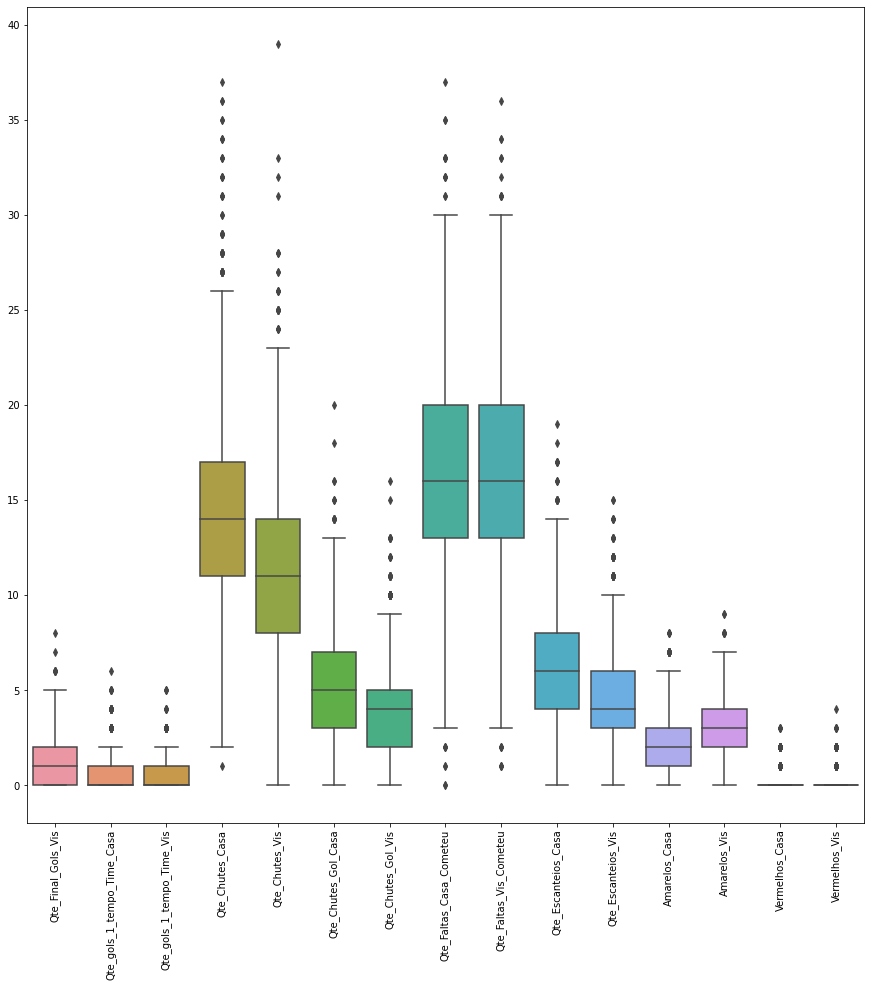

In [18]:
#plot the boxplot in order to evaluate if there are outliers
import seaborn as sns
g = sns.boxplot(data=futebol_ordenado.iloc[:,4:22])

g.figure.set_size_inches(15,15)

g.set_xticklabels(g.get_xticklabels(), rotation=90)

After evaluating the outliers, it is understood that they are outliers, but consistent with a soccer game. So we decided not to exclude them at this point.

In [19]:
#checks that there are more goals scored in the first half than in the game total, indicating an error in filling
display(HTML(futebol[futebol['Qte_gols_1_tempo_Time_Casa']>futebol['Qte_Final_Gols_Casa']].to_html()))
display(HTML(futebol[futebol['Qte_gols_1_tempo_Time_Vis']>futebol['Qte_Final_Gols_Vis']].to_html()))

a = futebol['Qte_Final_Gols_Casa']
            
a.describe()

,Data,Time_Casa,Time_Vis,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Resultado_Final,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Resultado_1_Tempo,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis


,Data,Time_Casa,Time_Vis,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Resultado_Final,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Resultado_1_Tempo,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis


count    3040.00
mean        1.57
std         1.31
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         8.00
Name: Qte_Final_Gols_Casa, dtype: float64

We will create new features, to count the points. We will consider a win as 3 points, draw 1 and defeat 0.

# DATA PREPARATION

Populate the new columns (features) with value 0:

In [20]:
futebol["Rodada"] = 0
futebol["Pontos_Totais_Casa"] = 0
futebol["Pontos_Totais_Vis"] = 0
futebol["Saldo_de_Gols_Casa"] = 0
futebol["Saldo_de_Gols_Vis"] = 0
futebol["Total_Gols_Pro"] = 0
futebol["Total_Gols_Sofridos"] = 0
futebol["Total_Amarelos_Casa"] = 0
futebol["Total_Amarelos_Vis"] = 0
futebol["Total_Vermelhos_Casa"] = 0
futebol["Total_Vermelhos_Vis"] = 0
futebol["Pontos_Casa"] = 0
futebol["Pontos_Vis"] = 0
futebol["Ranking_Casa"] = 0
futebol["Ranking_Vis"] = 0

In [21]:
futebol.head(10)

,Data,Time_Casa,Time_Vis,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Resultado_Final,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Resultado_1_Tempo,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis,Rodada,Pontos_Totais_Casa,Pontos_Totais_Vis,Saldo_de_Gols_Casa,Saldo_de_Gols_Vis,Total_Gols_Pro,Total_Gols_Sofridos,Total_Amarelos_Casa,Total_Amarelos_Vis,Total_Vermelhos_Casa,Total_Vermelhos_Vis,Pontos_Casa,Pontos_Vis,Ranking_Casa,Ranking_Vis
0,2005-10-01,Barcelona,Zaragoza,2,2,D,0,0,D,22,7,7,3,16,23,1,2,4,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005-10-01,Getafe,Valencia,2,1,H,1,1,D,12,9,6,2,25,24,2,0,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005-10-02,Cadiz,Celta,1,1,D,1,1,D,11,8,6,5,26,18,3,3,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2005-10-02,La Coruna,Osasuna,0,1,A,0,1,A,12,7,1,4,24,25,2,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2005-10-02,Malaga,Ath Madrid,0,2,A,0,1,A,7,14,2,7,19,20,4,6,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2005-10-02,Real Madrid,Mallorca,4,0,H,2,0,H,16,11,8,3,17,18,9,5,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2005-10-02,Santander,Alaves,1,2,A,0,1,A,9,9,4,3,26,9,6,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2005-10-02,Sevilla,Espanol,1,1,D,0,1,A,12,8,3,3,13,11,9,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2005-10-02,Sociedad,Betis,1,1,D,0,1,A,16,11,5,3,14,25,4,5,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2005-10-02,Villarreal,Ath Bilbao,3,1,H,1,1,D,19,10,6,5,11,15,7,2,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


To be able set the dataset which we will evaluate, we need to identify the start and end period of the leagues. European football, the seasons continue from one year to the next: 


Example: La Liga of 2011–12.


From: Saturday , Aug 27th of 2011


Until: Sunday , May 13yh of 2012

In [22]:
# All begin and end dates of the seasons
season_dates = {2005:['27/08/2005','20/05/2006'],2006:['26/08/2006','17/06/2007'],2007:['25/08/2007','18/05/2008'],2008:['30/08/2008','31/05/2009'],2009:['29/08/2009','16/05/2010'],2010:['28/08/2010','21/05/2011'],2011:['27/08/2011','13/05/2012'],2012:['27/08/2012','13/05/2013']}


In [23]:
def create_season_dataset(season_year, season_dates = season_dates):
    """create a dataset related to a specific season 
    Args:
        year (str): the year of the season that you want to analyze
    Returns:
        df (pandas dataframe): part of the database(futebol) with only the matches in that season
    """
    for key, value in season_dates.items():
        #check the year will want to evaluate
        if key==season_year:
          #create the mask using the dates of the specific year which you want to evaluate
          mask = ((futebol['Data'] >= value[0]) & (futebol['Data'] <= value[1]))
    
    return futebol.loc[mask].sort_values(by = 'Data')
  

As example, let's evaluate the Season of 2006:

In [24]:
futebol_2006_2007 = create_season_dataset(2006)
futebol_2006_2007.shape

(380, 36)

Let's check if the season dataset is ok:

In [25]:
futebol_2006_2007.head()

,Data,Time_Casa,Time_Vis,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Resultado_Final,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Resultado_1_Tempo,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis,Rodada,Pontos_Totais_Casa,Pontos_Totais_Vis,Saldo_de_Gols_Casa,Saldo_de_Gols_Vis,Total_Gols_Pro,Total_Gols_Sofridos,Total_Amarelos_Casa,Total_Amarelos_Vis,Total_Vermelhos_Casa,Total_Vermelhos_Vis,Pontos_Casa,Pontos_Vis,Ranking_Casa,Ranking_Vis
2562,2006-08-26,Valencia,Betis,2,1,H,1,0,H,14,8,4,5,18,26,5,6,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2677,2006-08-27,Espanol,Gimnastic,0,1,A,0,0,D,20,18,6,7,25,27,6,7,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2682,2006-08-27,Santander,Ath Madrid,0,1,A,0,1,A,16,11,8,4,25,25,11,2,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2681,2006-08-27,Recreativo,Mallorca,1,1,D,0,0,D,7,17,2,6,19,15,3,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2680,2006-08-27,Real Madrid,Villarreal,0,0,D,0,0,D,14,13,3,4,22,18,4,5,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking the numbers of teams:

In [26]:
futebol_2006_2007['Time_Casa'].nunique()

20

Checking if there are duplicated rows:

In [27]:
futebol_2006_2007.duplicated().sum()

0

Let's create the new features which support the ranking:

In [28]:

def populate_points_cards_and_goals(df):
  
  """Populate the dataset with cards and gols information 
    Args:
        dataset (dataframe): dataset from the season
    Returns:
        X (pandas dataframe): input data (feature information that we have before the match)
        Y (pandas dataframe): Classification labels
  """
  # Create the dictionaries which will support the values of the new features

  pontos_dict = dict()
  amarelos_dict = dict()
  vermelhos_dict = dict()
  gols_pro_dict = dict()
  gols_contra_dict = dict()

  cont = 0
  round = 1
  
  #check each row to identify the result and apply the points for home team and vistant team
  for index, i in df.iterrows():
   
    #If the final result is H, the home team earn 3 points, if final the result is D,
    # both earn 1 point and else, the away team earn 3 

    df.loc[index,'Rodada'] = round
    if df.loc[index,'Resultado_Final'] =='H':
      df.loc[index,'Pontos_Casa'] = 3
      df.loc[index,'Pontos_Vis'] = 0
    elif df.loc[index,'Resultado_Final'] =='D':
      df.loc[index,'Pontos_Casa'] = 1
      df.loc[index,'Pontos_Vis'] = 1
    else:
      df.loc[index,'Pontos_Casa'] = 0
      df.loc[index,'Pontos_Vis'] = 3

    cont +=1
  #identify the number of the round, which is based on the total number of teams 
    if cont == (df['Time_Casa'].nunique()/2):
       cont = 0
       round +=1   

  #inicializing the round and quantity of teams, to determine the how many rows 
  # corresponds the round.
  rodada = 1
  times = df['Time_Casa'].sort_values().unique()
  rodadas = df['Rodada'].sort_values().unique()
  
  #for time in times:
  for rod in rodadas:

    mask = (df['Rodada'] == rod)
    fut = df.loc[mask]

    for index, row in fut.iterrows():
        total = 0
        amarelos_total = 0
        vermelhos_total = 0
        gols_pro_total = 0
        gols_contra_total = 0

        #Evaluate for home team:
        if row['Time_Casa'] in pontos_dict:
            # append the new number to the existing array at this slot
            pontos_dict[row['Time_Casa']].append(row['Pontos_Casa'])
            amarelos_dict[row['Time_Casa']].append(row['Amarelos_Casa'])
            vermelhos_dict[row['Time_Casa']].append(row['Vermelhos_Casa'])
            gols_pro_dict[row['Time_Casa']].append(row['Qte_Final_Gols_Casa'])
            gols_contra_dict[row['Time_Casa']].append(row['Qte_Final_Gols_Vis'])

        else:
            # create a new array in this slot
            pontos_dict[row['Time_Casa']] = [row['Pontos_Casa']]
            amarelos_dict[row['Time_Casa']] = [row['Amarelos_Casa']]
            vermelhos_dict[row['Time_Casa']] = [row['Vermelhos_Casa']]
            gols_pro_dict[row['Time_Casa']] = [row['Qte_Final_Gols_Casa']]
            gols_contra_dict[row['Time_Casa']] = [row['Qte_Final_Gols_Vis']]
       
        #summarizing the quantities, regarding each feature
        total = sum([ int(x) for x in pontos_dict[row['Time_Casa']] ])
        df.loc[index,'Pontos_Totais_Casa'] = total
        amarelos_total = sum([ int(x) for x in amarelos_dict[row['Time_Casa']] ])
        df.loc[index,'Total_Amarelos_Casa'] = amarelos_total
        vermelhos_total = sum([ int(x) for x in vermelhos_dict[row['Time_Casa']] ])
        df.loc[index,'Total_Vermelhos_Casa'] = vermelhos_total
        gols_pro_total = sum([ int(x) for x in gols_pro_dict[row['Time_Casa']] ])
        df.loc[index,'Total_Gols_Pro'] = gols_pro_total
        gols_contra_total = sum([ int(x) for x in gols_contra_dict[row['Time_Casa']] ])
        df.loc[index,'Total_Gols_Sofridos'] = gols_contra_total
       
        df.loc[index,'Saldo_de_Gols_Casa'] = gols_pro_total - gols_contra_total
       
               
        #Evaluate for visit team:
        if row['Time_Vis'] in pontos_dict:

                pontos_dict[row['Time_Vis']].append(row['Pontos_Vis'])
                amarelos_dict[row['Time_Vis']].append(row['Amarelos_Vis'])
                vermelhos_dict[row['Time_Vis']].append(row['Vermelhos_Vis'])
                gols_pro_dict[row['Time_Vis']].append(row['Qte_Final_Gols_Vis'])
                gols_contra_dict[row['Time_Vis']].append(row['Qte_Final_Gols_Casa'])
 
        else:
                pontos_dict[row['Time_Vis']] = [row['Pontos_Vis']]
                amarelos_dict[row['Time_Vis']] = [row['Amarelos_Vis']]
                vermelhos_dict[row['Time_Vis']] = [row['Vermelhos_Vis']]
                gols_pro_dict[row['Time_Vis']] = [row['Qte_Final_Gols_Vis']]
                gols_contra_dict[row['Time_Vis']] = [row['Qte_Final_Gols_Casa']]

        total = sum([ int(x) for x in pontos_dict[row['Time_Vis']] ])
        df.loc[index,'Pontos_Totais_Vis'] = total
        amarelos_total = sum([ int(x) for x in amarelos_dict[row['Time_Vis']] ])
        df.loc[index,'Total_Amarelos_Vis'] = amarelos_total
        vermelhos_total = sum([ int(x) for x in vermelhos_dict[row['Time_Vis']] ])
        df.loc[index,'Total_Vermelhos_Vis'] = vermelhos_total
        gols_pro_total = sum([ int(x) for x in gols_pro_dict[row['Time_Vis']] ])
        df.loc[index,'Total_Gols_Pro'] = gols_pro_total
        gols_contra_total = sum([ int(x) for x in gols_contra_dict[row['Time_Vis']] ])
        df.loc[index,'Total_Gols_Sofridos'] = gols_contra_total

        df.loc[index,'Saldo_de_Gols_Vis'] = gols_pro_total - gols_contra_total
    
    #Update the dictionaries of points, goals pro and goals against
    new_dict = dict()
    for k, v in pontos_dict.items():
       new_dict.update({k:sum(v)})  
    
    new_dict_gols_pro = dict()
    for k, v in gols_pro_dict.items():
       new_dict_gols_pro.update({k:sum(v)})

    new_dict_gols_contra = dict()
    for k, v in gols_contra_dict.items():
       new_dict_gols_contra.update({k:sum(v)})          
    
    # identifying the balance of goals
    z =  {k: new_dict_gols_pro.get(k, 0) - new_dict_gols_contra.get(k, 0) for k in set(new_dict_gols_pro) & set(new_dict_gols_contra)}

    
    # to merge values
    def merge_values(val1, val2):
       if val1 is None:
         return [val2]
       elif val2 is None:
        return [val1]
       else:
        return [val1, val2]

    # updating the rank considering the values
    final_rank_dict = {key: merge_values(new_dict.get(key), z.get(key)) for key in set(new_dict).union(z)}

    rank_final = sorted(final_rank_dict, key=lambda k: (final_rank_dict[k], k), reverse = True)
    
    for index, row in fut.iterrows():
       posicao = 0
       posicao = rank_final.index(row['Time_Casa'])
       df.loc[index,'Ranking_Casa'] = posicao + 1
       posicao = rank_final.index(row['Time_Vis'])
       df.loc[index,'Ranking_Vis'] = posicao + 1
    
  return df


In [29]:
#updating the dataset with the respective values of new features
futebol_2006_2007 = populate_points_cards_and_goals(futebol_2006_2007)

In [30]:
#let's check if it works:
futebol_2006_2007.head(20)

,Data,Time_Casa,Time_Vis,Qte_Final_Gols_Casa,Qte_Final_Gols_Vis,Resultado_Final,Qte_gols_1_tempo_Time_Casa,Qte_gols_1_tempo_Time_Vis,Resultado_1_Tempo,Qte_Chutes_Casa,Qte_Chutes_Vis,Qte_Chutes_Gol_Casa,Qte_Chutes_Gol_Vis,Qte_Faltas_Casa_Cometeu,Qte_Faltas_Vis_Cometeu,Qte_Escanteios_Casa,Qte_Escanteios_Vis,Amarelos_Casa,Amarelos_Vis,Vermelhos_Casa,Vermelhos_Vis,Rodada,Pontos_Totais_Casa,Pontos_Totais_Vis,Saldo_de_Gols_Casa,Saldo_de_Gols_Vis,Total_Gols_Pro,Total_Gols_Sofridos,Total_Amarelos_Casa,Total_Amarelos_Vis,Total_Vermelhos_Casa,Total_Vermelhos_Vis,Pontos_Casa,Pontos_Vis,Ranking_Casa,Ranking_Vis
2562,2006-08-26,Valencia,Betis,2,1,H,1,0,H,14,8,4,5,18,26,5,6,3,3,0,0,1,3,0,1,-1,1,2,3,3,0,0,3,0,3,18
2677,2006-08-27,Espanol,Gimnastic,0,1,A,0,0,D,20,18,6,7,25,27,6,7,2,3,0,0,1,0,3,-1,1,1,0,2,3,0,0,0,3,16,5
2682,2006-08-27,Santander,Ath Madrid,0,1,A,0,1,A,16,11,8,4,25,25,11,2,3,4,0,1,1,0,3,-1,1,1,0,3,4,0,1,0,3,15,7
2681,2006-08-27,Recreativo,Mallorca,1,1,D,0,0,D,7,17,2,6,19,15,3,2,3,2,0,0,1,1,1,0,0,1,1,3,2,0,0,1,1,10,12
2680,2006-08-27,Real Madrid,Villarreal,0,0,D,0,0,D,14,13,3,4,22,18,4,5,2,3,0,0,1,1,1,0,0,0,0,2,3,0,0,1,1,11,8
2679,2006-08-27,Osasuna,Getafe,0,2,A,0,0,D,15,7,7,2,26,22,6,1,5,4,0,0,1,0,3,-2,2,2,0,5,4,0,0,0,3,19,2
2676,2006-08-27,Ath Bilbao,Sociedad,1,1,D,1,0,H,7,10,2,4,19,23,4,2,2,4,0,0,1,1,1,0,0,1,1,2,4,0,0,1,1,13,9
2678,2006-08-27,La Coruna,Zaragoza,3,2,H,2,1,H,14,13,6,6,22,19,1,6,4,4,0,1,1,3,0,1,-1,2,3,4,4,0,1,3,0,4,14
2780,2006-08-28,Celta,Barcelona,2,3,A,1,0,H,12,12,3,6,21,16,4,7,0,2,1,0,1,0,3,-1,1,3,2,0,2,1,0,0,3,17,6
2860,2006-08-29,Sevilla,Levante,4,0,H,2,0,H,18,6,10,3,1,3,6,1,1,3,0,0,1,3,0,4,-4,0,4,1,3,0,0,3,0,1,20


Finally the data preparation is finished. Now we have a new dataset, with all new features filled.

In [31]:
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# MODELING & RESULTS

Functions to split the dataset with the corresponding season which you want to predict, build, train and evaluate the model:

In [45]:
def split_data(df, random_state_value, test_size):
    
    """Split dataset and sets X and Y 
    Args:
        dataset (dataframe): dataset from the season
    Returns:
        X (pandas dataframe): input data (feature information that we have before the match)
        Y (pandas dataframe): Classification labels
    """    

    X = df.loc[:,['Pontos_Totais_Casa','Saldo_de_Gols_Casa','Saldo_de_Gols_Vis','Pontos_Totais_Vis','Total_Amarelos_Casa','Total_Vermelhos_Casa','Total_Amarelos_Vis','Total_Vermelhos_Vis','Ranking_Casa','Ranking_Vis']]
    y = df.loc[:,['Resultado_Final']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state_value, test_size=test_size)

    return X_train, X_test, y_train, y_test 


def build_model():
    """Returns the model
    Args:
        None
    Returns:
        model (scikit-learn XGBClassifier()): Fit the model
    """

    model = xgb.XGBClassifier()
 

    pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
    ])

    grid_params = {
    'pca__n_components': [5, 10, 15, 20],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 50, 100],
    'model__learning_rate':[0.01,0.1]
    }

           
    #Create Model
    GS = GridSearchCV(
        pipeline, 
        grid_params,
        verbose=1,
        cv=2,        
        n_jobs= -1,
        return_train_score=True
    )
   
  
    return GS
    
  


def evaluate_model(model, X_test, Y_test, category_names =('A','D','H')):


    """Prints multi-output classification report results 
    Args:
        model (dataframe): the scikit-learn fitted model
        X_text (dataframe): The X test set
        Y_test (dataframe): the Y test classifications
        category_names (list): the category names
    Returns:
        None
   """
    y_pred = model.predict(X_test)

    print("Classifier XGBoost:\n XGBClassifier()")
    print("--------------------------------------")
    print("Acuracy of train database: {:.2f}".format(model.score(X_train, y_train)))
    print("Acuracy of test database: {:.2f}".format(model.score(X_test, y_test)))
    print("--------------------------------------")

    print(classification_report(y_test, y_pred, target_names=('A','D','H')))
    


    cnf_matrix = confusion_matrix(y_test, y_pred)
    cnf_table = pd.DataFrame(data=cnf_matrix, index=('A','D','H'), columns=('A','D','H'))
    print(cnf_table)


    mean_score = model.cv_results_["mean_test_score"][model.best_index_]
    std_score = model.cv_results_["std_test_score"][model.best_index_]

    model.best_params_, mean_score, std_score

    print(f"Best parameters: {model.best_params_}")
    print(f"Mean CV score: {mean_score: .6f}")
    print(f"Standard deviation of CV score: {std_score: .6f}")
   

Let's split the data to build the model. Our target (y) corresponding to the final result column, and for X, we will select only those fields that we have before the match. 

In [33]:
X_train, X_test, y_train, y_test = split_data(futebol_2006_2007,0,0.25)

Let's build, train and evaluate the model

In [46]:
print('Building model...')
model = build_model()
        
print('Training model...')
model.fit(X_train, y_train)
        
print('Evaluating model...')
evaluate_model(model, X_test, y_test)


Building model...
Training model...
Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Evaluating model...
Classifier XGBoost:
 XGBClassifier()
--------------------------------------
Acuracy of train database: 0.58
Acuracy of test database: 0.49
--------------------------------------
              precision    recall  f1-score   support

           A       0.42      0.75      0.54        24
           D       0.14      0.04      0.06        26
           H       0.62      0.62      0.62        45

    accuracy                           0.49        95
   macro avg       0.39      0.47      0.41        95
weighted avg       0.44      0.49      0.45        95

    A  D   H
A  18  3   3
D  11  1  14
H  14  3  28
Best parameters: {'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 50, 'pca__n_components': 5}
Mean CV score:  0.477347
Standard deviation of CV score:  0.043780


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# Using the Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# CV model
X = futebol_2006_2007.loc[:,['Pontos_Totais_Casa','Saldo_de_Gols_Casa','Saldo_de_Gols_Vis','Pontos_Totais_Vis','Total_Amarelos_Casa','Total_Vermelhos_Casa','Total_Amarelos_Vis','Total_Vermelhos_Vis','Ranking_Casa','Ranking_Vis']]
Y = futebol_2006_2007.loc[:,['Resultado_Final']]
model = build_model()
kfold = KFold(n_splits=10, random_state=7)
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
results = cross_validate(model, X, Y.values.ravel(), cv=kfold, scoring=scoring, return_train_score = True)
#print(sorted(results.keys()))
print("Train Accuracy: %.2f%% (%.2f%%)" % (results['train_accuracy'].mean()*100, results['train_accuracy'].std()*100))
print("Test Accuracy: %.2f%% (%.2f%%)" % (results['test_accuracy'].mean()*100, results['test_accuracy'].std()*100))
print("Test Precision: %.2f%% (%.2f%%)" % (results['test_precision_macro'].mean()*100, results['test_precision_macro'].std()*100))
print("Test Recall: %.2f%% (%.2f%%)" % (results['test_recall_macro'].mean()*100, results['test_recall_macro'].std()*100))
print("Test F1: %.2f%% (%.2f%%)" % (results['test_f1_macro'].mean()*100, results['test_f1_macro'].std()*100))





/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 120 candidates, totalling 240 fits
Train Accuracy: 63.07% (8.39%)
Test Accuracy: 51.05% (9.58%)
Test Precision: 38.66% (11.78%)
Test Recall: 44.31% (8.91%)
Test F1: 39.95% (9.95%)


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.4s finished
